# Rubik's Cube

## Making the cube

First, we'll define the Faces and Pieces.

In [1]:
%matplotlib inline
from matplotlib.colors import ListedColormap,BoundaryNorm
import numpy as np
import matplotlib.pyplot as plt
class Face:
    RED = 0#'RED'
    BLUE = 1#'BLUE'
    WHITE = 2#'WHITE'
    ORANGE = 3#'ORANGE'
    GREEN = 4#'GREEN'
    YELLOW = 5#'YELLOW'
class Piece:
    mod = 1
    def __init__(self, faces):
        self.f = faces
        self.o = 0
    def add_orient(self, num):
        self.o = (self.o + num) % self.mod
    def ori(self):
        return self.o
    def faces(self):
        return self.f
class Corner(Piece):
    mod = 3
class Edge(Piece):
    mod = 2
class Middle(Piece):
    mod = 1
    
position = []
def reset_cube():
    try:
        Move.count = 0
    except:
        pass
    position = [Piece([])]
    position.append(Corner([Face.RED, Face.BLUE, Face.YELLOW]))
    position.append(Edge([Face.RED, Face.BLUE]))
    position.append(Corner([Face.RED, Face.WHITE, Face.BLUE]))
    position.append(Edge([Face.RED, Face.YELLOW]))
    position.append(Middle([Face.RED]))
    position.append(Edge([Face.RED, Face.WHITE]))
    position.append(Corner([Face.RED, Face.YELLOW, Face.GREEN]))
    position.append(Edge([Face.RED, Face.GREEN]))
    position.append(Corner([Face.RED, Face.GREEN, Face.WHITE]))
    position.append(Edge([Face.BLUE, Face.YELLOW]))
    position.append(Middle([Face.BLUE]))
    position.append(Edge([Face.BLUE, Face.WHITE]))
    position.append(Middle([Face.YELLOW]))
    position.append(Piece([]))
    position.append(Middle([Face.WHITE]))
    position.append(Edge([Face.GREEN, Face.YELLOW]))
    position.append(Middle([Face.GREEN]))
    position.append(Edge([Face.GREEN, Face.WHITE]))
    position.append(Corner([Face.ORANGE, Face.YELLOW, Face.BLUE]))
    position.append(Edge([Face.ORANGE, Face.BLUE]))
    position.append(Corner([Face.ORANGE, Face.BLUE, Face.WHITE]))
    position.append(Edge([Face.ORANGE, Face.YELLOW]))
    position.append(Middle([Face.ORANGE]))
    position.append(Edge([Face.ORANGE, Face.WHITE]))
    position.append(Corner([Face.ORANGE, Face.GREEN, Face.YELLOW]))
    position.append(Edge([Face.ORANGE, Face.GREEN]))
    position.append(Corner([Face.ORANGE, Face.WHITE, Face.GREEN]))
    return position
position = reset_cube()

Next up, the different Sides and how they interact with Pieces.

In [2]:
class Side:
    pieces = []
    side = []
    cmap = ListedColormap(['red', 'blue', 'white', 'orange', 'green', 'yellow'])
    norm = BoundaryNorm([0,1,2,3,4,5,6], cmap.N)
    fig_num = 0
    @classmethod
    def view_side(self):
        output = []
        for i in range(len(self.pieces)):
            x = position[self.pieces[i]]
            output.append(x.faces()[(x.ori() + self.side[i]) % x.mod])
        return output
    @classmethod
    def viz(self):
        Side.fig_num+=1
        fig = plt.figure(Side.fig_num)
        plt.title(self.__name__)
        plt.xticks([-0.5,0.5,1.5,2.5], ['','','','']);
        plt.yticks([-0.5,0.5,1.5,2.5], ['','','','']);
        plt.imshow(np.reshape(self.view_side(), (3,3)),origin='upper',interpolation='nearest',cmap=self.cmap, norm=self.norm)
        plt.grid(which='major',color='black', linestyle='-', linewidth=2)
class TopSide(Side):
    pieces = [7,8,9,4,5,6,1,2,3]
    side = [0,0,0,0,0,0,0,0,0]
class BottomSide(Side):
    pieces = [19,20,21,22,23,24,25,26,27]
    side = [0,0,0,0,0,0,0,0,0]
class FrontSide(Side):
    pieces = [1,2,3,10,11,12,19,20,21]
    side = [1,1,2,0,0,0,2,1,1]
class BackSide(Side):
    pieces = [9,8,7,18,17,16,27,26,25]
    side = [1,1,2,0,0,0,2,1,1]
class LeftSide(Side):
    pieces = [7,4,1,16,13,10,25,22,19]
    side = [1,1,2,1,0,1,2,1,1]
class RightSide(Side):
    pieces = [3,6,9,12,15,18,21,24,27]
    side = [1,1,2,1,0,1,2,1,1]

def view_cube():
    TopSide.viz()
    FrontSide.viz()
    RightSide.viz()
    BackSide.viz()
    LeftSide.viz()
    BottomSide.viz()
def validate():
    a = TopSide.view_side()
    b = FrontSide.view_side()
    c = RightSide.view_side()
    d = BackSide.view_side()
    e = LeftSide.view_side()
    f = BottomSide.view_side()
    return a.count(a[0]) == len(a) and b.count(b[0]) == len(b) and c.count(c[0]) == len(c) \
            and d.count(d[0]) == len(d) and e.count(e[0]) == len(e) and f.count(f[0]) == len(f)

Then, we define the Moves of a Rubik's Cube.

In [3]:
class Move:
    pos_list = [0,0,0,0,0,0,0,0]
    orient_adjust = [0,0,0,0,0,0,0,0]
    count = 0
    @classmethod
    def run(self, num=1):
        for i in range(num%4):
            self.reorient()
            self.swap()
            Move.count += 1
    @classmethod
    def reorient(self):
        for i in range(len(self.pos_list)):
            position[self.pos_list[i]].add_orient(self.orient_adjust[i])
    @classmethod
    def swap(self):
        a6 = position[self.pos_list[6]]
        a7 = position[self.pos_list[7]]
        for i in range(len(self.pos_list)-2):
            position[self.pos_list[7-i]] = position[self.pos_list[5-i]]
        position[self.pos_list[0]] = a6
        position[self.pos_list[1]] = a7
class LU_Move(Move):
    pos_list = [1,4,7,16,25,22,19,10]
    orient_adjust = [1,0,-1,0,1,0,-1,0]
class MU_Move(Move):
    pos_list = [2,5,8,17,26,23,20,11]
    orient_adjust = [1,0,1,0,1,0,1,0]
class RU_Move(Move):
    pos_list = [3,6,9,18,27,24,21,12]
    orient_adjust = [-1,0,1,0,-1,0,1,0]
class TL_Move(Move):
    pos_list = [1,4,7,8,9,6,3,2]
    orient_adjust = [0,0,0,0,0,0,0,0]
class ML_Move(Move):
    pos_list = [10,13,16,17,18,15,12,11]
    orient_adjust = [1,0,1,0,1,0,1,0]
class BL_Move(Move):
    pos_list = [19,22,25,26,27,24,21,20]
    orient_adjust = [0,0,0,0,0,0,0,0]
class RLU_Move(Move):
    pos_list = [1,10,19,20,21,12,3,2]
    orient_adjust = [-1,1,1,1,-1,1,1,1]
class RMU_Move(Move):
    pos_list = [4,13,22,23,24,15,6,5]
    orient_adjust = [1,0,1,0,1,0,1,0]
class RRU_Move(Move):
    pos_list = [7,16,25,26,27,18,9,8]
    orient_adjust = [1,1,-1,1,1,1,-1,1]
def RotateDown(num=1):
    for i in range(num%4):
        LU_Move.run();MU_Move.run();RU_Move.run()
def RotateRight(num=1):
    for i in range(num%4):
        TL_Move.run();ML_Move.run();BL_Move.run()
def RotateCC(num=1): #counter-clockwise
    for i in range(num%4):
        RLU_Move.run();RMU_Move.run();RRU_Move.run()

def mixup(n=100):
    moves = [LU_Move,MU_Move,RU_Move,TL_Move,ML_Move,BL_Move,RLU_Move,RMU_Move,RRU_Move]
    for i in range(n):
        moves[np.random.randint(9)].run()

# Now let's play!

## Viewing the Cube

You can play with the cube by executing moves, and view it by running ```view_cube()```.

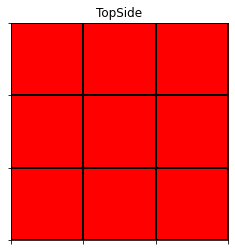

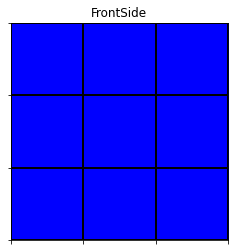

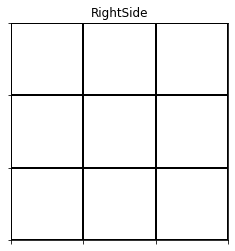

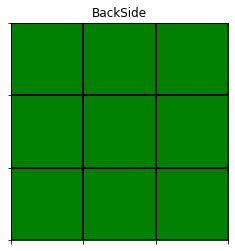

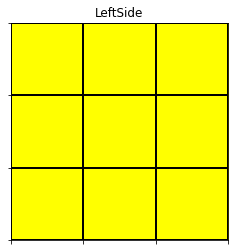

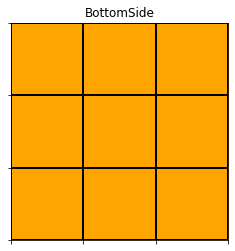

In [4]:
position=reset_cube()
view_cube()


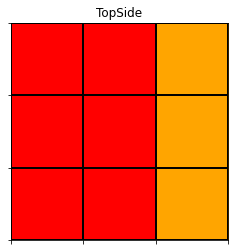

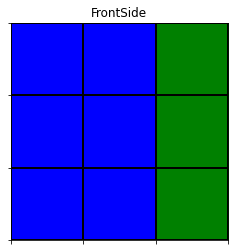

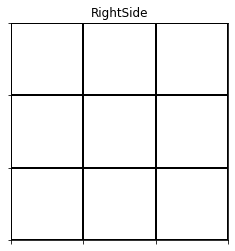

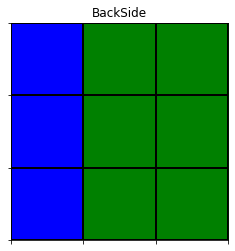

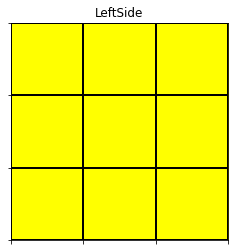

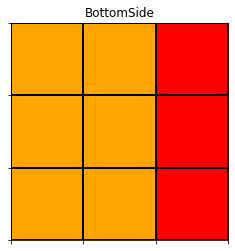

In [5]:
RU_Move.run(2)
view_cube()

## Mixing up the Cube 
```mixup(n)``` runs _n_ random moves on the cube. It's like mixing the cube up!

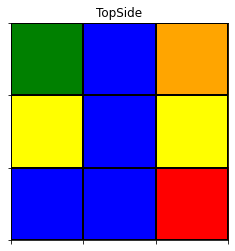

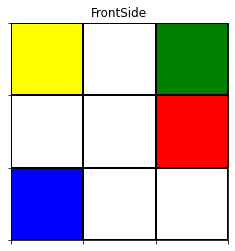

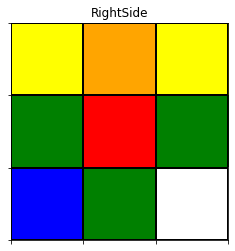

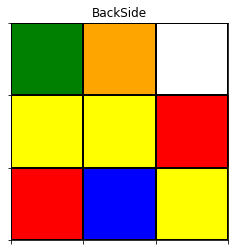

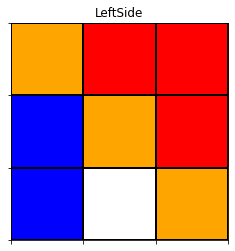

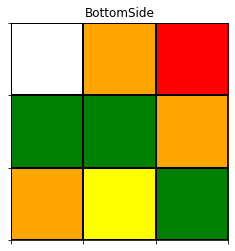

In [6]:
position=reset_cube()
mixup(100)
view_cube()

## Try your own

Now you try! Have fun :)

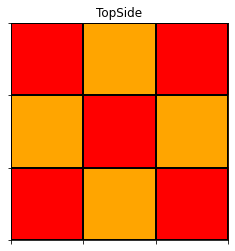

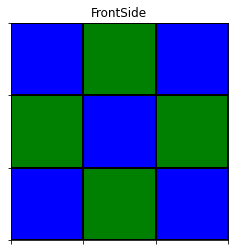

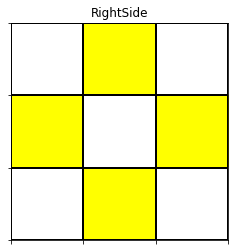

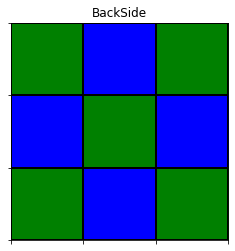

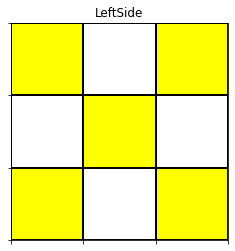

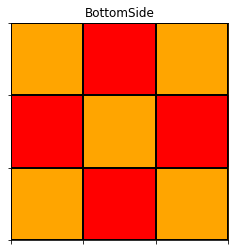

In [7]:
position = reset_cube()
MU_Move.run(2)
ML_Move.run(2)
RMU_Move.run(2)
view_cube()